<img align="center" src="data/handout/course.png" width="800">

## Hough Transform - Assignment 1
    Instructor: Kris                          TAs: Rawal (Lead), Yan, Zen, Wen-Hsuan, Paritosh, Qichen

In this assignment you will be implementing a Hough Transform based line detector. 

<img align="center" src="data/handout/ht.gif" width="500">

---
## Theory Questions (25 points)
**Grading**: 
- Each question is 5 points. 
- Please add your answers to the writeup. Insert images whenever necessary.
- Show all your work to obtain full credit.

**Q1**: Show that using $ x\cos \theta + y \sin \theta - \rho = 0 $, each image point $(x, y)$ results in a sinsuoid in $(\rho, \theta)$ hough space.  
Use the formulation, $a \sin \theta + b \cos \theta = A \sin(\theta + \phi)$ for the sinsuoid.  
Write the amplitude \\(A \\) and phase \\( \phi \\) of the sinusoid as a function of \\( (x, y) \\). 

We want to show that $x \cos \theta + y \sin \theta = \rho$ can be represented as a single sinusoid. To do so we first use inverse Euler formulas to convert to complex exponentials signals.
$$ x \frac{1}{2} (e^{j\theta} + e^{-j\theta}) + y \frac{1}{2j} (e^{j\theta} - e^{-j\theta}) $$
We combine exponentials with the same frequency.
$$ \frac{1}{2} (x - jy) e^{j\theta} + \frac{1}{2} (x + jy) e^{-j\theta} $$
We want to convert the complex coefficients $(x - jy), (x + jy)$ into their exponential form to multiply them into the signals
$$ \frac{1}{2} \sqrt{x^2 + y^2}e^{-j\arctan(\frac{y}{x})} e^{j\theta} + \frac{1}{2} \sqrt{x^2 + y^2}e^{j\arctan(\frac{y}{x})} e^{-j\theta} $$
$$ \frac{1}{2}(\sqrt{x^2 + y^2})(e^{j(\theta - \arctan(\frac{y}{x}))} + e^{-j(\theta - \arctan(\frac{y}{x}))}) $$
Then we can use the inverse Euler formula for cos again to recover the cosine form
$$ (\sqrt{x^2 + y^2}) \cos(\theta - \arctan(\frac{y}{x})) $$
To get the sine form we can simply shift the cosine by $\frac{\pi}{2}$.
$$ (\sqrt{x^2 + y^2}) \sin(\theta - \arctan(\frac{y}{x}) + \frac{\pi}{2}) $$
Therefore we get $A = \sqrt{x^2 + y^2}, \phi = \arctan(\frac{y}{x}) + \frac{\pi}{2}$.

**Q2**: Why do we parameterize the line in terms of \\(\rho, \theta\\) instead of slope and intercept \\((m, c)\\)?  
Also write the slope \\(m\\) and intercept \\(c\\) as a function of \\(\rho\\) and \\(\theta\\). 

We parameterize interms of $p, \theta$ because all lines going through a bounded $x, y$ can be represented in a bounded $p, \theta$. This is not true for the $m, c$ parameterization; consider some lines approaching vertical, their slopes can get arbitrarily large (in terms of absolute value) and the same goes for their intercepts. This issue arises no matter how small the $x, y$ that you need the lines to go through is.

In order to find the intercept $c$, we can first let $x = 0$. In normal form this gives us:
$$0\cos\theta + y \sin\theta = \rho \implies y = \rho \csc\theta$$
From slope intercept form we know:
$$y = m 0 + b \implies y = b$$
Putting these together we get:
$$b = \rho\csc\theta$$

Similarly, to find $m$ we first let $x = 1$. In normal form this gives:
$$\cos\theta + y\sin\theta = \rho \implies y = \rho\csc\theta - \cot\theta$$
From slope intercept we have:
$$y = m + b \implies y - b = m$$
We already know $b = \rho\csc\theta$ so we can conclude:
$$m = -\cot\theta$$

**Q3**: Assume the image points \\((x, y)\\) are in an image of width \\(W\\) and height \\(H\\), \\(x \in [1, W], y \in [1, H]\\).  
What is the maximum absolute value of \\(\rho\\) and what is the range of \\(\theta\\)?

The maximum absolute value of $\rho$ is $\sqrt{W^2 + H^2}$, $\theta$ can go from $0$ to $\pi$ because after an offset of $\pi$ radians you are representing the same line again.

**Q4**: For points $(10, 10)$, $(15, 15)$ and $(30, 30)$ in the image, plot the corresponding sinusoid waves in Hough space $(\rho, \theta)$.  
Also visualize how their intersection point defines the line (what is ($m, c$) for this line?).  
Please add the plot as image.

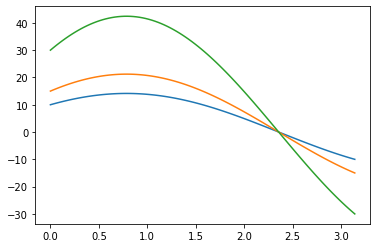

In [20]:
import numpy as np
import matplotlib.pyplot as plt

points = [(10, 10), (15, 15), (30, 30)]
theta = np.linspace(0, np.pi, num=100)
for point in points:
    rho = np.sqrt(point[0]**2 + point[1]**2) * np.sin(theta - np.arctan(point[1] / point[0]) + np.pi / 2)
    plt.plot(theta, rho)
    
plt.show()

One intersection looks to be at $(0, \frac{3\pi}{4})$

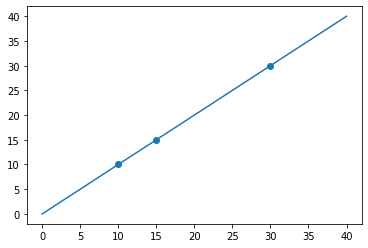

In [21]:
x = np.linspace(0, 40)
y = 0 + -1 * x * np.cos(3 * np.pi / 4) / np.sin(3 * np.pi / 4)
plt.scatter([x[0] for x in points], [x[1] for x in points])
plt.plot(x, y)
plt.show()

**Q5**: How does the dimension of parameter space affects Hough Transform method? What would you do when the parameter space is high, i.e., 3D or 4D instead of 2D? Briefly explain your method.

If the pixel space increases in dimension, say to 3D, a 2D parameter space is no longer sufficient to describe the lines in the image. In addition, in 3D space hyperplanes are planes rather than lines so I will be looking at finding planes rather than lines. The parameterization we will use for planes will be $a, b, c, d$ to represent the plane $ax + by + cz = d$. In order to reduce redundancy in this parameterization and also keep the space needed to represent planes bounded, we will require that the vector $[a, b, c]^T$ be of unit length and that $d$ be positive. With these restrictions we guarantee that $a, b, c \in [-1, 1]$ and $d \in [0, \sqrt{l^2 + w^2 + h^2}]$ where $l, w, h$ are the dimensions of the 3D image/point cloud/whatever, and we can also interpret $[a, b, c]^T$ to be the unit length normal vector of the plane and the $d$ to be the distance of the closest point on the plane to the origin. This is similar to the normal form of the line used in the 2D Hough transform but instead of requiring only 2 parameters to describe, it now requires 4. Similar to the 2D Hough transform again, one point in image space corresponds to many planes in parameter space. Consider the origin in pixel space, any plane with $d$ = 0 satisfies this and the $a, b, c$ that are unit length make a sphere in 3 space. Therefore the set of planes that include the origin in Hough space looks like a sphere extended through a 4th dimension.

There are some issues with higher dimensional parameter spaces however. As dimension increases, volume increases far more than surface area. The result of this is that Hough accumulator entries will be far more sparse in higher dimensions, resulting in buildup in bins being less common. This exacerbates the effect of noise: the same amount of noise would be a far larger problem for a higher dimensional Hough accumulator.

**Images for Code Problem 4.2**

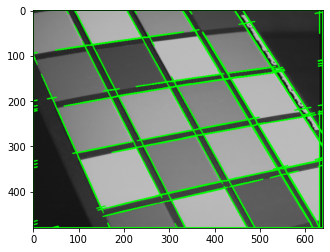

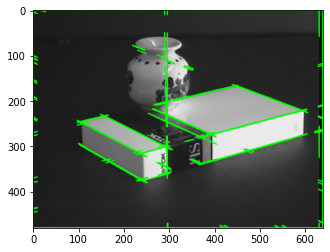

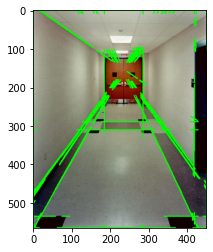

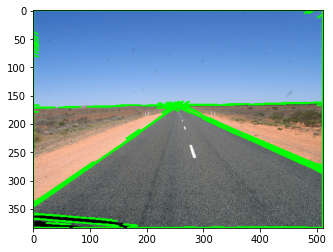

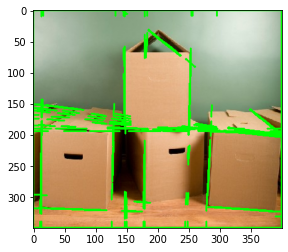

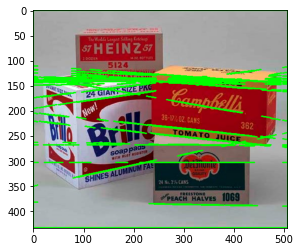

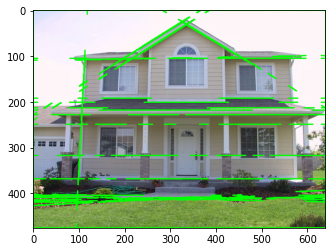

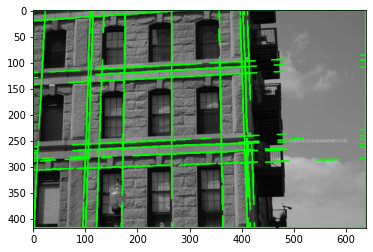

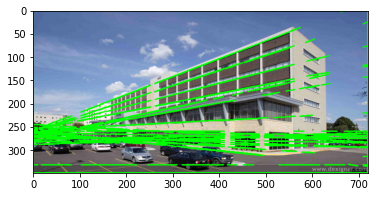

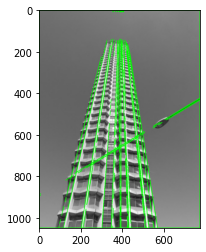